## IMPORTING THE LIBRARIES

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [24]:
df = pd.read_csv("SampleSuperstore.csv")  #loading dataset
df.head(5)    #display top 5 rows

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [25]:
df.shape

(9994, 13)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [27]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [28]:
df.isnull()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,False,False,False,False,False,False,False,False,False,False,False,False,False
9990,False,False,False,False,False,False,False,False,False,False,False,False,False
9991,False,False,False,False,False,False,False,False,False,False,False,False,False
9992,False,False,False,False,False,False,False,False,False,False,False,False,False


In [29]:
df["Ship Mode"].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [30]:
df["Segment"].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [31]:
df["Country"].value_counts()

United States    9994
Name: Country, dtype: int64

In [33]:
df["City"].value_counts()

New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
                ... 
Abilene            1
Elyria             1
Atlantic City      1
Jupiter            1
Springdale         1
Name: City, Length: 531, dtype: int64

In [34]:
df["State"].value_counts()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Virginia                 224
Arizona                  224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Mississippi               53
Utah                      53
Louisiana                 42
South Carolina            42
Nevada        

In [35]:
df["Category"].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [36]:
df["Sub-Category"].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

#### From the above observation we can see there is only country United States so we can delete the country column.We can also delete the postal code column since there is no use of it in our analysis

In [37]:
df.drop(["Country","Postal Code"],axis=1,inplace=True)

In [38]:
df.head(5)

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


#### PERFORMING DATA VISUALIZATION FOR MORE INFORMATION

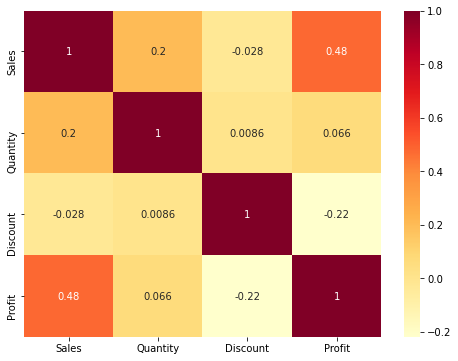

In [39]:
plt.figure(figsize =(8,6))
sns.heatmap(df.corr(),annot =True,cmap = 'YlOrRd')
plt.show()

#### PAIR PLOT

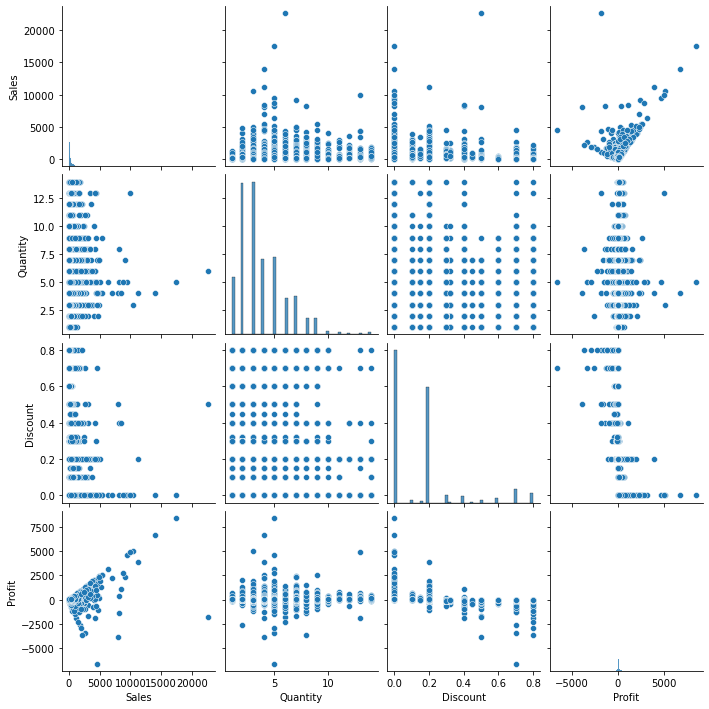

In [41]:
sns.pairplot(df)
plt.show()

### Distribution of numeric variables

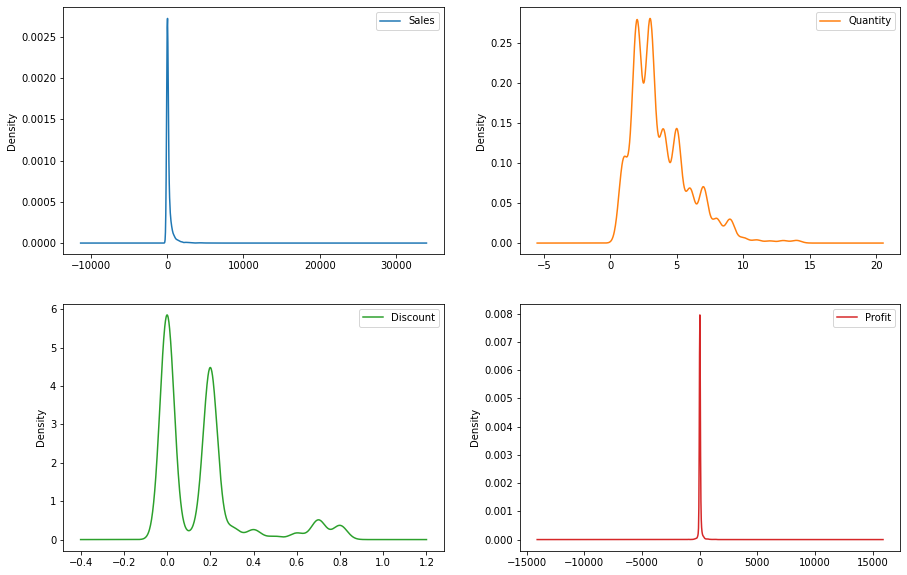

In [42]:
df_numeric = df.select_dtypes(include='number')
df_numeric.plot(kind = 'kde',subplots = True, layout = (2,2), sharex = False, figsize = (15,10))
plt.show()

#### There are many extreme values in Sales and Profit and few in discount and quantity.

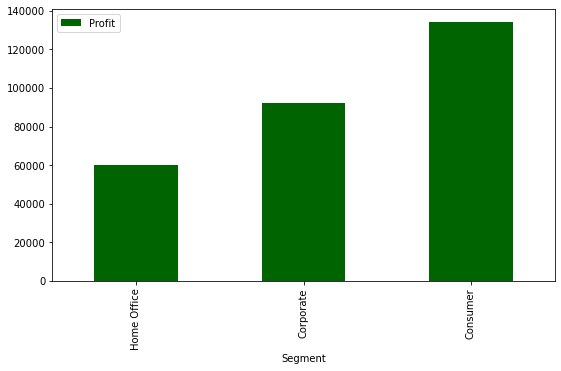

In [43]:
# finding out which segment has the highest and lowest profit
p = df.groupby(by ='Segment')[['Profit']].sum()
r = p.sort_values(by = ['Profit'],ascending = True)
r.plot(kind = 'bar',figsize =(9,5),color='darkgreen')
plt.show()


#### OBSERVATION 1- From the above observation we can see that Consumer has the highest profit where as Home Office has the lowest profit. So to increase profit we must focus on Home Office and Segment.

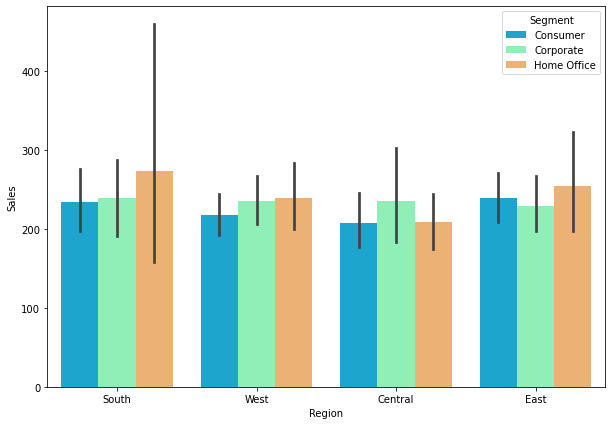

In [44]:
## let's compare state vs profit

plt.figure(figsize=(10, 7))
sns.barplot(x="Region", y="Sales", hue="Segment", data=df,palette='rainbow')
plt.show()

#### OBSERVATION 2- From the above observation we can see that in south region Home Office has highest sale whereas Corporate and consumer have almost equal sale. In West region Consumer has the lowest profit and the other two segments are almost equal. In Central region Corporate has the highest sale whearas Consumer and Home office have almost equal profit. In East region Home office has the highest sale whereas Consumer and Corporate have almost equal sale. In order to increase the profit the segments having lowest sale must be taken care of.

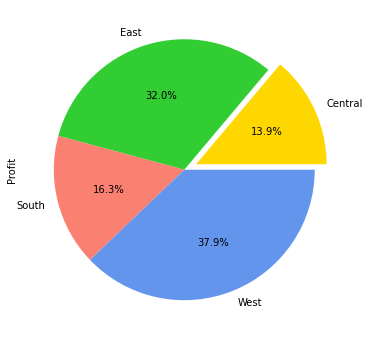

In [45]:
plt.figure(figsize =(8,6))
df.groupby(by ='Region')['Profit'].sum().plot(kind = 'pie',autopct='%1.1f%%',explode=(0.1, 0, 0,0),colors = ['gold', 'limegreen', 'salmon', 'cornflowerblue'])
plt.show()

#### OBSERVATION 3- From the above pie chart it is clearly visible that the Central region has the lowest profit whereas the West has the highest profit. So in order to increase profit we must focus on Central and South region.

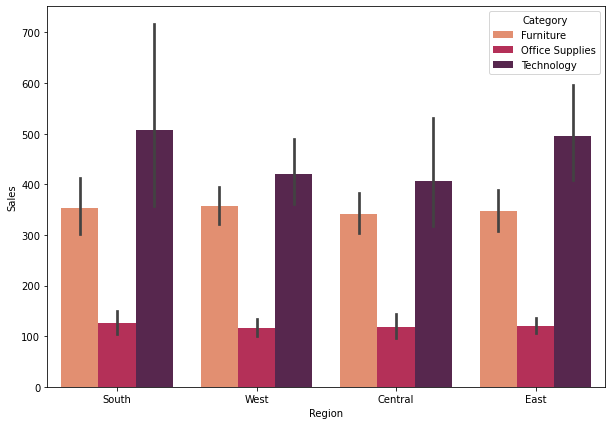

In [46]:
plt.figure(figsize=(10, 7))
sns.barplot(x="Region", y="Sales", hue="Category", data=df,palette="rocket_r")
plt.show()

#### OBSERVATION 4- The categoty wise sales is the highest in South region whereas it is almost similar in other regions.

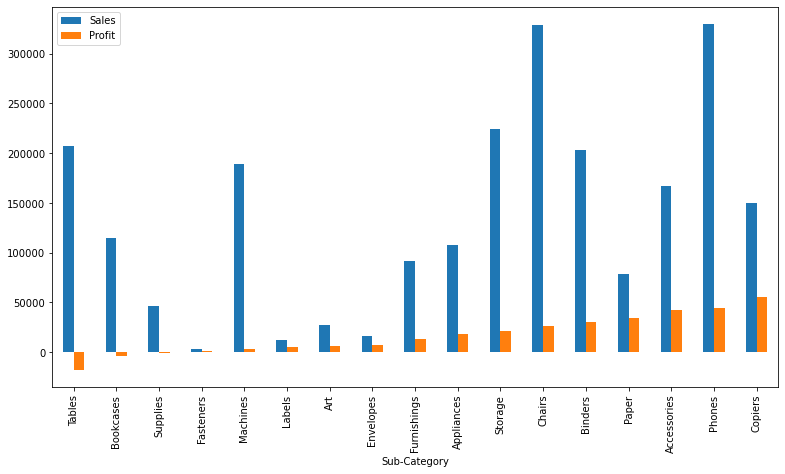

In [47]:
subcategory_grpby = df.groupby(by ='Sub-Category')[['Sales','Profit']].sum()
sort_profit2 = subcategory_grpby.sort_values(by = ['Profit'],ascending = True)
sort_profit2.plot(kind = 'bar',figsize =(13,7))
plt.show()

#### OBSERVATION 5- From the above graph we can see that tables has the lowest profit and Copiers has the highest profit. The sales is highest in case of phones and lowest in case of Fasteners.

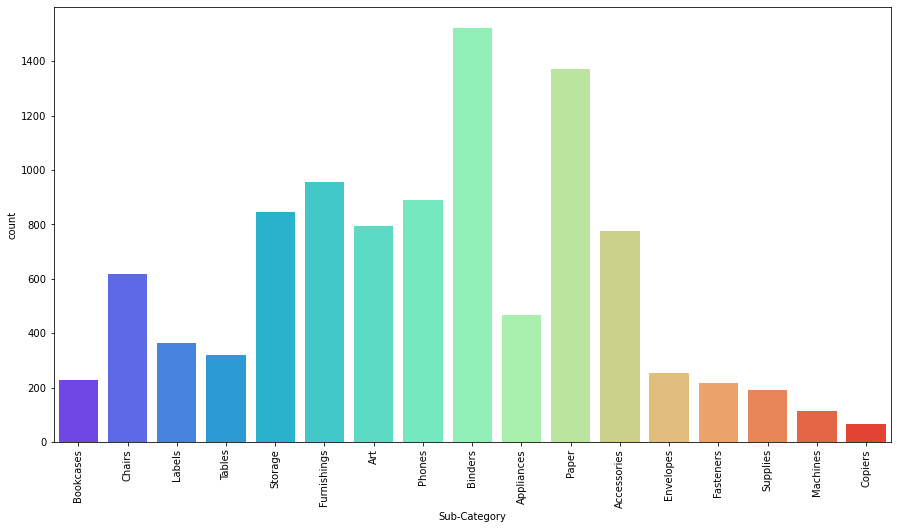

In [48]:
plt.figure(figsize=(15,8))
sns.countplot(x='Sub-Category',data=df,palette='rainbow')
plt.xticks(rotation=90)
plt.show()

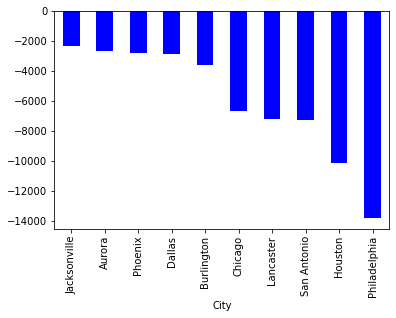

In [49]:
df.groupby(by ='City')['Profit'].sum().sort_values(ascending = False)[521:].plot(kind = 'bar',color='blue')
plt.show()

#### OBSERVATION 6- In order to increase profit we must focus on Philadelphia since it has the lowest profit.

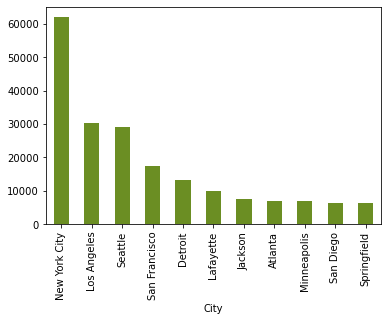

In [50]:
df.groupby(by ='City')['Profit'].sum().sort_values(ascending = False)[:11].plot(kind = 'bar',color='olivedrab')
plt.show()

#### OBSERVATION 7- From the above graph we can see that New York City has the highest profit.

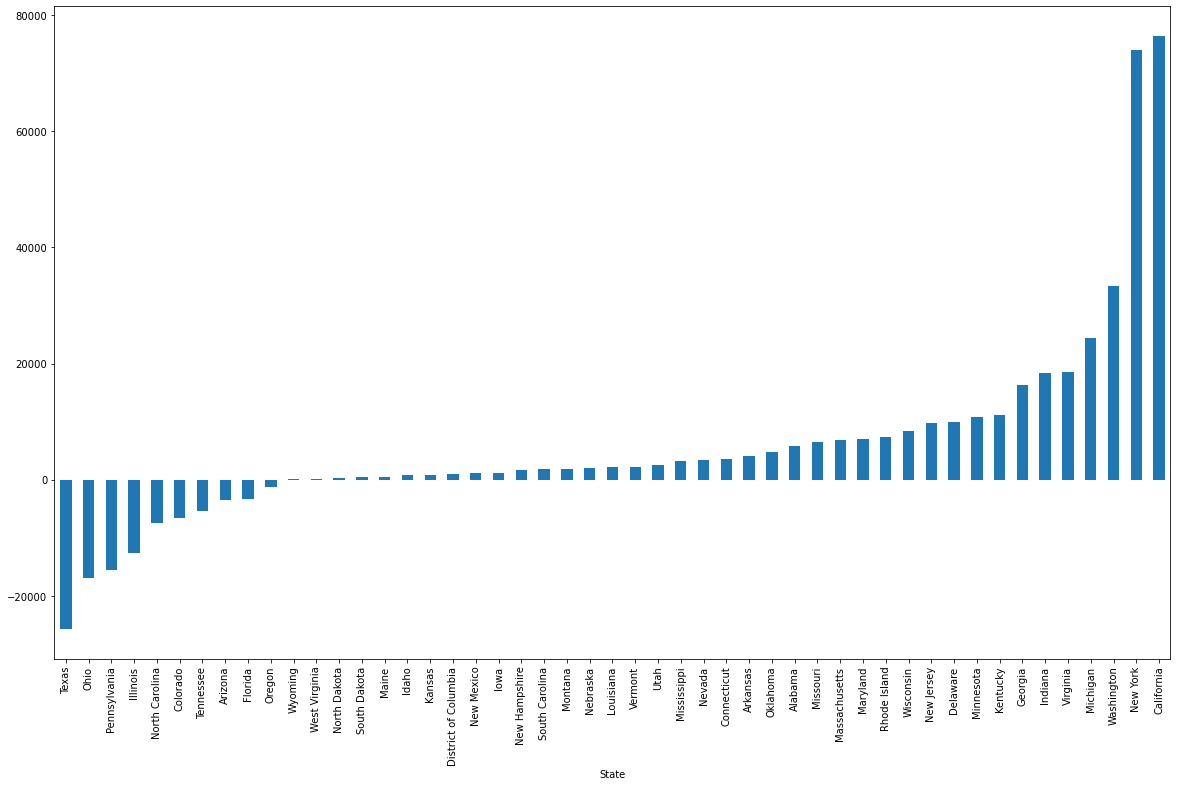

In [51]:
# State vs Profit
plt.figure(figsize =(20,12))
df.groupby(by ='State')['Profit'].sum().sort_values(ascending = True).plot(kind = 'bar')
plt.show()

#### OBSERVATION 8- From the above graph we can see that sales is lowest in Texas and highest in California.

#### Discount Vs Profit

Text(0.5, 1.0, 'Discount and Profit')

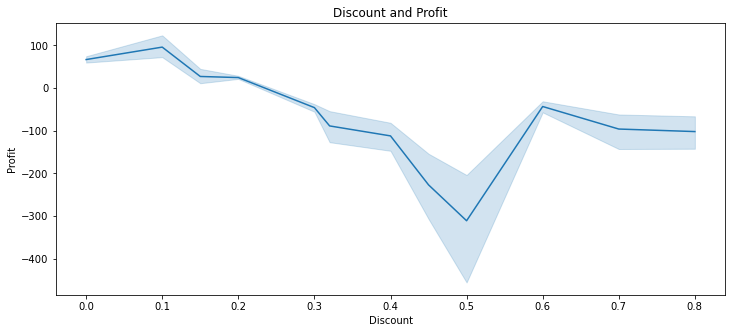

In [52]:
plt.figure(figsize=(12,5))
sns.lineplot(x='Discount',y='Profit',data=df)
plt.title("Discount and Profit")

#### Discount VS Sales

Text(0.5, 1.0, 'Discount VS Sales')

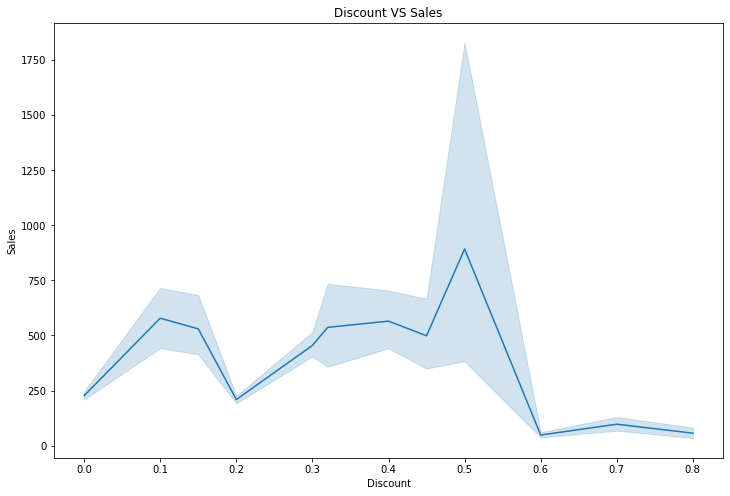

In [53]:
plt.figure(figsize=(12,8))
sns.lineplot(x='Discount',y='Sales',data=df)
plt.title('Discount VS Sales')

#### Discount VS Profit

In [54]:
df[['Discount','Profit']].corr()

,Discount,Profit
Discount,1.000000,-0.219487
Profit,-0.219487,1.000000


##### There is a negative correlation between Discount and Profit. As discount increases Profit decreases.